In [1]:
%load_ext autoreload
%autoreload 2

# External imports
from typing import List
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Local imports
from fart.constants import classes as cl
from fart.constants import feature_names as fn
from fart.features.calculate_technical_indicators import calculate_technical_indicators
from fart.features.parse_timestamp_to_datetime import parse_timestamp_to_datetime
from fart.features.trade_signals import TradeSignals
from fart.model.train_test_split import train_test_split
from fart.utils.get_last_modified_data_file import get_last_modified_data_file
from fart.visualization.plot_confusion_matrix import plot_confusion_matrix

In [2]:
# Get the last modified data file
last_modified_data_file = get_last_modified_data_file("../data")

# Load data and calculate technical indicators
df = pl.read_csv(last_modified_data_file)
df = parse_timestamp_to_datetime(df)
df = calculate_technical_indicators(df)

# Generate trading signals based on technical indicators
trade_signals = TradeSignals(df)
trade_signals.generate()
trade_signals.optimize()

# Assign processed data to df
df = trade_signals.df

In [3]:
# Select relevant features
df = df.select(
    [
        fn.BBANDS_LOWER,
        fn.BBANDS_MIDDLE,
        fn.BBANDS_UPPER,
        fn.EMA_FAST,
        fn.EMA_SLOW,
        fn.MACD,
        fn.MACD_SIGNAL,
        fn.MACD_HISTOGRAM,
        fn.RSI,
        fn.TRADE_SIGNAL,
    ]
)

df = df.drop_nans()

In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df)

              precision    recall  f1-score   support

          -1       0.04      0.01      0.01       411
           0       0.96      0.99      0.98     18635
           1       0.00      0.00      0.00       410

    accuracy                           0.95     19456
   macro avg       0.33      0.33      0.33     19456
weighted avg       0.92      0.95      0.93     19456



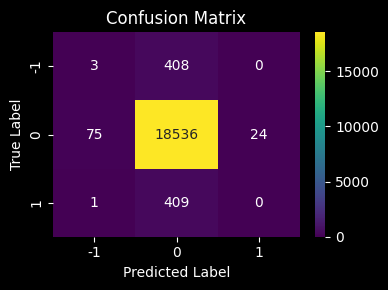

In [5]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

          -1       0.08      0.00      0.00       411
           0       0.96      1.00      0.98     18635
           1       1.00      0.00      0.00       410

    accuracy                           0.96     19456
   macro avg       0.68      0.33      0.33     19456
weighted avg       0.94      0.96      0.94     19456



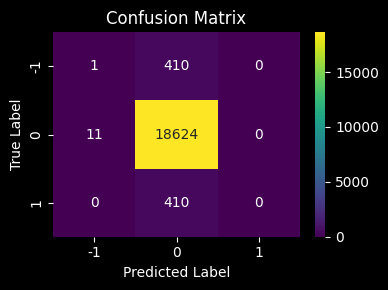

In [6]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

          -1       1.00      0.00      0.00       411
           0       0.96      1.00      0.98     18635
           1       1.00      0.00      0.00       410

    accuracy                           0.96     19456
   macro avg       0.99      0.33      0.33     19456
weighted avg       0.96      0.96      0.94     19456



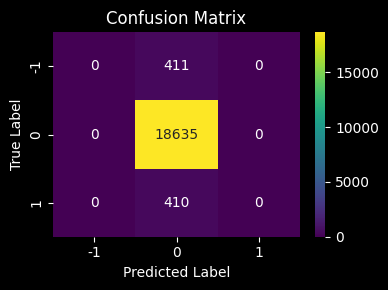

In [7]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

          -1       1.00      0.00      0.00       411
           0       0.96      1.00      0.98     18635
           1       1.00      0.00      0.00       410

    accuracy                           0.96     19456
   macro avg       0.99      0.33      0.33     19456
weighted avg       0.96      0.96      0.94     19456



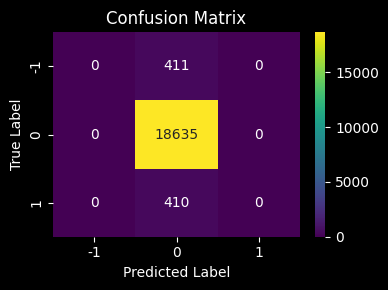

In [8]:
# Support Vector Machine classifier
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred)